In [2]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



sns.set(rc = {'figure.figsize':(5,5)})

%matplotlib inline

In [3]:
feedback_elearning = pd.read_csv('dataset/Feedback_ELearn_2020.csv')

In [4]:
feedback_elearning.head()

,Bulan,Course,Category,Jumlah Partisipan,Kecepatan pelayanan,Kemudahan fungsi fungsi untuk digunakan,Kemudahan nama situs untuk diingat,Kemudahan situs untuk dipahami,Kemudahan untuk dihubungi,Kemudahan untuk dipahami,Kenyamanan dalam mempelajari materi,Keramahan petugas,Manfaat terhadap tugas,Pengetahuan terhadap situs,Sistematika Penulisan,Tampilan situs,Final Score
0,1,Fraud Klaim Asuransi,ADMEDIKA,1,100.00,100.00,0.00,100.00,100.00,70.00,100.00,100.00,100.00,100.00,100.00,100.00,89.17
1,1,Basic Procurement,Business Enabler / Enterprise Management (EL-EEM),1,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
2,1,Paradigma Spiritual,Business Enabler / Enterprise Management (EL-EEM),4,91.25,91.25,91.25,91.25,91.25,91.25,90.67,91.25,91.25,91.25,91.25,91.25,91.20
3,1,PMBOK,Business Enabler / Enterprise Management (EL-EEM),10,88.11,87.43,89.47,88.11,89.47,88.11,86.67,88.95,91.50,89.47,87.78,88.33,88.62
4,1,Spiritual (Islam) Bekerja Ma allah,Business Enabler / Enterprise Management (EL-EEM),2,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00


In [5]:
feedback_elearning.describe()

,Bulan,Kecepatan pelayanan,Kemudahan fungsi fungsi untuk digunakan,Kemudahan nama situs untuk diingat,Kemudahan situs untuk dipahami,Kemudahan untuk dihubungi,Kemudahan untuk dipahami,Kenyamanan dalam mempelajari materi,Keramahan petugas,Manfaat terhadap tugas,Pengetahuan terhadap situs,Sistematika Penulisan,Tampilan situs,Final Score
count,2570.000000,2570.000000,2570.000000,2570.000000,2570.000000,2570.000000,2570.000000,2570.000000,2570.000000,2570.000000,2570.000000,2570.000000,2570.000000,2570.000000
mean,6.439300,90.758101,91.196537,91.322401,89.169798,90.777977,91.609374,91.112926,90.899541,92.330510,90.899152,91.903323,91.051074,91.086257
std,3.017855,11.371856,10.163694,10.244177,17.598739,11.106859,9.070625,9.975912,10.950328,5.845252,10.819960,6.055594,10.348712,8.908971
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,60.000000,0.000000,13.330000
25%,4.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
50%,6.000000,91.685000,91.990000,92.160000,92.060000,91.640000,92.380000,92.055000,91.795000,92.550000,91.760000,92.110000,91.930000,91.990000
75%,9.000000,95.380000,95.560000,95.560000,95.560000,95.380000,95.560000,95.560000,95.380000,95.560000,95.380000,95.560000,95.560000,95.050000
max,11.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [6]:
feedback_elearning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2570 entries, 0 to 2569
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Bulan                                    2570 non-null   int64  
 1   Course                                   2570 non-null   object 
 2   Category                                 2570 non-null   object 
 3   Jumlah Partisipan                        2570 non-null   object 
 4   Kecepatan pelayanan                      2570 non-null   float64
 5   Kemudahan fungsi fungsi untuk digunakan  2570 non-null   float64
 6   Kemudahan nama situs untuk diingat       2570 non-null   float64
 7   Kemudahan situs untuk dipahami           2570 non-null   float64
 8   Kemudahan untuk dihubungi                2570 non-null   float64
 9   Kemudahan untuk dipahami                 2570 non-null   float64
 10  Kenyamanan dalam mempelajari materi      2570 no

In [7]:
#pengecekan jumlah data null
feedback_elearning.isnull().sum()

Bulan                                      0
Course                                     0
Category                                   0
Jumlah Partisipan                          0
Kecepatan pelayanan                        0
Kemudahan fungsi fungsi untuk digunakan    0
Kemudahan nama situs untuk diingat         0
Kemudahan situs untuk dipahami             0
Kemudahan untuk dihubungi                  0
Kemudahan untuk dipahami                   0
Kenyamanan dalam mempelajari materi        0
Keramahan petugas                          0
Manfaat terhadap tugas                     0
Pengetahuan terhadap situs                 0
Sistematika Penulisan                      0
Tampilan situs                             0
Final Score                                0
dtype: int64

In [8]:
#change format type to numeric
feedback_elearning['Jumlah Partisipan']=feedback_elearning['Jumlah Partisipan'].str.replace(r'\D', '')
feedback_elearning['Jumlah Partisipan'] = pd.to_numeric(feedback_elearning['Jumlah Partisipan'])

In [10]:
#cek apakah index ke-4 (Jumlah partisipan) telah berubah tipe nya
feedback_elearning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2570 entries, 0 to 2569
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Bulan                                    2570 non-null   int64  
 1   Course                                   2570 non-null   object 
 2   Category                                 2570 non-null   object 
 3   Jumlah Partisipan                        2570 non-null   int64  
 4   Kecepatan pelayanan                      2570 non-null   float64
 5   Kemudahan fungsi fungsi untuk digunakan  2570 non-null   float64
 6   Kemudahan nama situs untuk diingat       2570 non-null   float64
 7   Kemudahan situs untuk dipahami           2570 non-null   float64
 8   Kemudahan untuk dihubungi                2570 non-null   float64
 9   Kemudahan untuk dipahami                 2570 non-null   float64
 10  Kenyamanan dalam mempelajari materi      2570 no

In [11]:
#cek nama kolom 
feedback_elearning.columns

Index(['Bulan', 'Course', 'Category', 'Jumlah Partisipan',
       'Kecepatan pelayanan', 'Kemudahan fungsi fungsi untuk digunakan',
       'Kemudahan nama situs untuk diingat', 'Kemudahan situs untuk dipahami',
       'Kemudahan untuk dihubungi', 'Kemudahan untuk dipahami',
       'Kenyamanan dalam mempelajari materi', 'Keramahan petugas',
       'Manfaat terhadap tugas', 'Pengetahuan terhadap situs',
       'Sistematika Penulisan', 'Tampilan situs', 'Final Score'],
      dtype='object')

In [12]:
feedback_elearning.head()

,Bulan,Course,Category,Jumlah Partisipan,Kecepatan pelayanan,Kemudahan fungsi fungsi untuk digunakan,Kemudahan nama situs untuk diingat,Kemudahan situs untuk dipahami,Kemudahan untuk dihubungi,Kemudahan untuk dipahami,Kenyamanan dalam mempelajari materi,Keramahan petugas,Manfaat terhadap tugas,Pengetahuan terhadap situs,Sistematika Penulisan,Tampilan situs,Final Score
0,1,Fraud Klaim Asuransi,ADMEDIKA,1,100.00,100.00,0.00,100.00,100.00,70.00,100.00,100.00,100.00,100.00,100.00,100.00,89.17
1,1,Basic Procurement,Business Enabler / Enterprise Management (EL-EEM),1,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
2,1,Paradigma Spiritual,Business Enabler / Enterprise Management (EL-EEM),4,91.25,91.25,91.25,91.25,91.25,91.25,90.67,91.25,91.25,91.25,91.25,91.25,91.20
3,1,PMBOK,Business Enabler / Enterprise Management (EL-EEM),10,88.11,87.43,89.47,88.11,89.47,88.11,86.67,88.95,91.50,89.47,87.78,88.33,88.62
4,1,Spiritual (Islam) Bekerja Ma allah,Business Enabler / Enterprise Management (EL-EEM),2,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00


### Measures of Central Tendency

#### MEAN

In [78]:
#nilai mean pada Kolom "tampilan situs"
tampilan_situs = feedback_elearning['Tampilan situs']
tampilan_situs_numpy = np.array(tampilan_situs)
tampilan_situs_pandas = pd.Series(tampilan_situs)
tampilan_situs

0       100.00
1       100.00
2        91.25
3        88.33
4        90.00
         ...  
2565     91.68
2566     96.15
2567     91.15
2568     91.00
2569     90.69
Name: Tampilan situs, Length: 2570, dtype: float64

In [79]:
mean_tampilan_situs_general = sum(tampilan_situs)/len(tampilan_situs)
mean_tampilan_situs_general

91.05107392996118

In [80]:
#nilai mean menggunakan scipy
mean_tampilan_situs_scipy = statistics.mean(tampilan_situs)
mean_tampilan_situs_scipy

91.05107392996109

In [81]:
#nilai mean menggunakan numpy
mean_tampilan_situs_numpy = np.mean(tampilan_situs_numpy)
mean_tampilan_situs_numpy

91.05107392996109

In [82]:
#nilai mean menggunakan pandas
tampilan_situs_pandas.mean()

91.05107392996118

#### MEDIAN

In [83]:
tampilan_situs

0       100.00
1       100.00
2        91.25
3        88.33
4        90.00
         ...  
2565     91.68
2566     96.15
2567     91.15
2568     91.00
2569     90.69
Name: Tampilan situs, Length: 2570, dtype: float64

In [84]:
statistics.median_low(tampilan_situs[:-1])

91.93

In [85]:
statistics.median_high(tampilan_situs[:-1])

91.93

In [86]:
statistics.median(tampilan_situs[:-1])

91.93

#### MODUS

In [87]:
#nilai modus versi numpy

np.median(tampilan_situs)

91.93

In [88]:
statistics.mode(tampilan_situs)

90.0

In [89]:
#nilai modus versi scipy (muncul counternya)

scipy.stats.mode(tampilan_situs)

ModeResult(mode=array([90.]), count=array([409]))

In [90]:
#nilai modus versi pandas
tampilan_situs_pandas.mode()

0    90.0
dtype: float64

### Measures of Variability (Spread)


#### Range

In [103]:
#pandas
np.ptp(tampilan_situs_pandas)

100.0

In [104]:
#numpy
np.ptp(tampilan_situs_numpy)

100.0

In [105]:
#range pada kolom tampilan situs
np.ptp(tampilan_situs)


100.0

#### Variance

In [113]:
#scipy
statistics.variance(tampilan_situs)

107.095835592041

In [114]:
#numpy
np.var(tampilan_situs, ddof=1)

107.09583559204076

In [115]:
#pandas
tampilan_situs_pandas.var(ddof=1)

107.09583559204076

#### Standard Deviation

In [116]:
#scipy
statistics.stdev(tampilan_situs)

10.348711784180725

In [117]:
#numpy
np.std(tampilan_situs_numpy,ddof=1)

10.348711784180724

In [118]:
#pandas
tampilan_situs_pandas.std(ddof=1)

10.348711784180713

### Probability Distribution

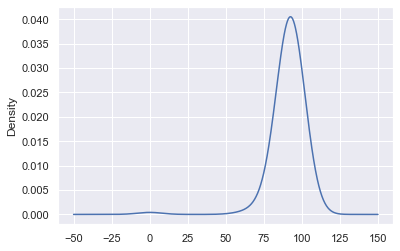

In [128]:
#normal distribution
tampilan_situs_pandas.plot.kde(bw_method=0.8)

### Confidence Interval

In [140]:
feedback_elearning_CI = pd.read_csv('dataset/Feedback_ELearn_2020.csv')
feedback_elearning_CI.head()
feedback_elearning_CI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2570 entries, 0 to 2569
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Bulan                                    2570 non-null   int64  
 1   Course                                   2570 non-null   object 
 2   Category                                 2570 non-null   object 
 3   Jumlah Partisipan                        2570 non-null   object 
 4   Kecepatan pelayanan                      2570 non-null   float64
 5   Kemudahan fungsi fungsi untuk digunakan  2570 non-null   float64
 6   Kemudahan nama situs untuk diingat       2570 non-null   float64
 7   Kemudahan situs untuk dipahami           2570 non-null   float64
 8   Kemudahan untuk dihubungi                2570 non-null   float64
 9   Kemudahan untuk dipahami                 2570 non-null   float64
 10  Kenyamanan dalam mempelajari materi      2570 no

In [143]:
#feedback_elearning_CI.groupby('Category').agg({'t':[np.mean, np.std, np.size]})
feedback_elearning_CI.groupby('Category').agg({'Tampilan situs':[np.mean, np.std, np.size]})

Tampilan situs             \
                                                            mean        std   
Category                                                                      
ADMEDIKA                                               80.154468  16.778126   
Business Enabler / Enterprise Management (EL-EEM)      89.707755  14.131008   
CLASSICAL SUPPORT                                      92.850870   4.249967   
Commerce & Relations (EL-COR)                          91.655081  10.187793   
Digital & ICT (EL-DIC)                                 92.017029   7.777292   
General (EL-GNR)                                       90.326221  13.642919   
Profressional (EL-PRO)                                 89.805000   2.884783   
Risk & Compliance (EL-RIC)                             91.190526   4.315043   
SIGMA                                                  75.420000   4.206923   
SSI                                                    91.805000   3.546237   
Strategic Plan & Development (EL-SPD)                  91.915000   4.780524   
TELKOMSEL                                              91.390000   3.808641   
Top & New Courses                                      91.301259   3.509519   

                                                           
                                                     size  
Category                                                   
ADMEDIKA                                             47.0  
Business Enabler / Enterprise Management (EL-EEM)   147.0  
CLASSICAL SUPPORT                                    23.0  
Commerce & Relations (EL-COR)                       246.0  
Digital & ICT (EL-DIC)                             1067.0  
General (EL-GNR)                                    696.0  
Profressional (EL-PRO)                                8.0  
Risk & Compliance (EL-RIC)                           19.0  
SIGMA                                                 6.0  
SSI                                                   8.0  
Strategic Plan & Development (EL-SPD)                20.0  
TELKOMSEL                                             5.0  
Top & New Courses                                   278.0

In [144]:
#kita ambil kategori "Top & New Courses"
mean = 91.30
sd = 3.50
n = 278

#nilai z ditentukan
z_score= 1.96

In [146]:
se = sd / np.sqrt(n)
se

0.20991605036642352

In [148]:
low = mean - z_score*se
hi = mean +z_score*se

In [149]:
(low,hi)

(90.88856454128181, 91.71143545871819)